In [ ]:
import time
import json
import os
import sys
sys.path.append('../')
from routemining import createfiles

def read_variables(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            variables = json.load(file)
        return variables
    else:
        return []

def write_variables(file_path, variables):
    with open(file_path, 'w') as file:
        json.dump(variables, file, indent=4)

def add_variable(file_path, variable_value):
    variables = read_variables(file_path)
    variables = variable_value+variables
    write_variables(file_path, variables)

file_path="./measuretimeresultstask1.json"
actual_file_path="/home/felix/Documents/Python/DataMining/DataMining/data/actual20.json"

for x in range(3):
    limitdata=10000
    timerdata={}
    while(limitdata<=100000):
        print(limitdata)
        start_time = time.time()
        createfiles(actual_file_path, actual_file_path, "./dump.json", 1, limitdata)
        end_time=time.time()
        
        timer=end_time-start_time
        timerdata[limitdata]=timer

        limitdata=limitdata+10000
        print(timer)
    add_variable(file_path, timerdata)

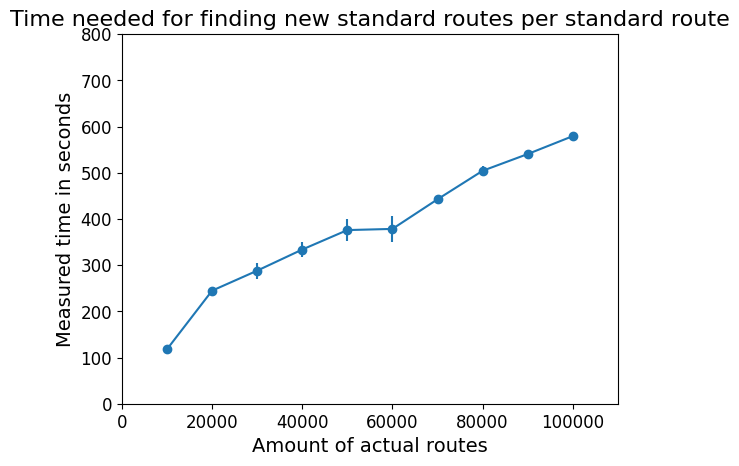

In [49]:
import matplotlib.pyplot as plt
import numpy as np
data=read_variables("./measuretimeresultstask1.json")

limitdata=10000
x_values=[]
y_values=[]
means=[]
std_devs=[]
while(limitdata<=100000):
    templist=[]
    for element in data:
        for number in element:
            if int(number)==limitdata:
               templist.append(element[number])
    x_values.append(limitdata)
    means.append(np.mean(templist))
    std_devs.append(np.std(templist))
    
    limitdata=limitdata+10000

plt.errorbar(x_values, means, yerr=std_devs, fmt='o-', label='Data with Error Bars')
plt.xlabel('Amount of actual routes', fontsize=14)
plt.ylabel('Measured time in seconds', fontsize=14)
plt.ylim(0, 800)
plt.xlim(0, 110000)
plt.title('Time needed for finding new standard routes per standard route', fontsize=16)
plt.xticks(fontsize=12)  # X-axis tick labels font size
plt.yticks(fontsize=12)  # Y-axis tick labels font size

plt.show()

In [ ]:
import time
import json
import os
import sys
sys.path.append('../')
from routemining import createfiles

def read_variables(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            variables = json.load(file)
        return variables
    else:
        return []

def write_variables(file_path, variables):
    with open(file_path, 'w') as file:
        json.dump(variables, file, indent=4)

def add_variable(file_path, variable_value):
    variables = read_variables(file_path)
    variables = variable_value+variables
    write_variables(file_path, variables)

file_path="./measuretimeresultstask2.json"
actual_file_path="/home/felix/Documents/Python/DataMining/DataMining/data/actual20.json"
standard_file_path="/home/felix/Documents/Python/DataMining/DataMining/data/standard20.json"
for x in range(3):
    limitdata=1000
    timerdata={}
    while(limitdata<=10000):
        print(limitdata)
        start_time = time.time()
        createfiles(actual_file_path, standard_file_path, "./dump.json", 2, limitdata, prints=False)
        end_time=time.time()
        timer=end_time-start_time
        timerdata[limitdata]=timer
        limitdata=limitdata+1000
    add_variable(file_path, [timerdata])

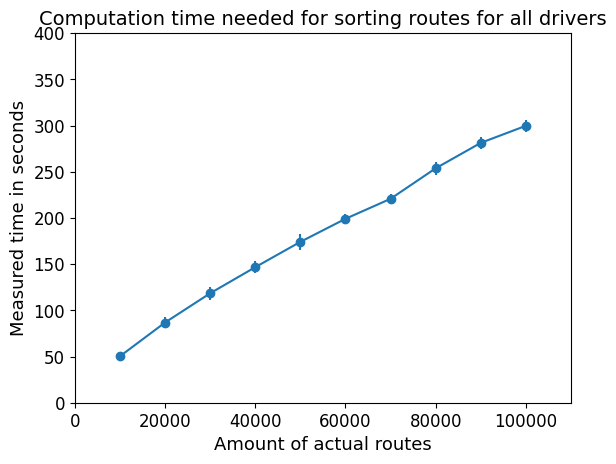

In [55]:
import matplotlib.pyplot as plt
import numpy as np
data=read_variables("./measuretimeresultstask2.json")

limitdata=1000
x_values=[]
y_values=[]
means=[]
std_devs=[]
while(limitdata<=10000):
    templist=[]
    for element in data:
        for number in element:
            if int(number)==limitdata:
               templist.append(element[number])
    x_values.append(limitdata*10)
    means.append(np.mean(templist))
    std_devs.append(np.std(templist))
    
    limitdata=limitdata+1000
plt.errorbar(x_values, means, yerr=std_devs, fmt='o-', label='Data with Error Bars')
plt.xlabel('Amount of actual routes', fontsize=13)
plt.ylabel('Measured time in seconds', fontsize=13)
plt.ylim(0, 400)
plt.xlim(0, 110000)
plt.xticks(fontsize=12)  # X-axis tick labels font size
plt.yticks(fontsize=12)  # Y-axis tick labels font size

plt.title('Computation time needed for sorting routes for all drivers', fontsize=14)
plt.show()